<a href="https://colab.research.google.com/github/Rwolste/DS-3001-Assignments/blob/main/Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1) 1. How are trees constructed?
Trees are built by repeatedly splitting the data into smaller groups. At each step, the algorithm picks the feature and value that best divides the data into two parts based on some criteria like reducing error or increasing purity. It keeps splitting until it hits a stopping rule, like a max depth or minimum number of samples. The final groups, or “leaves,” give us the prediction.

2. How do trees handle non-linear relationships between variables? How does that compare to linear models?
Trees are really good at handling non-linear relationships because they don’t assume the data follows a straight line. Instead, they make decisions by splitting the data into chunks — kind of like carving out regions where different rules apply. Linear models, on the other hand, assume a consistent, straight-line relationship, which means they miss more complex patterns unless you manually transform the variables.

3. Why is the Gini index a good loss function for categorical targets?
The Gini index helps measure how “pure” a group of labels is — meaning how mixed or unmixed it is. A lower Gini score means the data in that node mostly belongs to one class, which is what we want. It’s fast to calculate and works well for classification problems, which is why it’s commonly used in decision trees.

4. Why do trees tend to overfit, and how can we prevent it?
Trees tend to overfit because they’ll keep splitting until they’ve captured every little detail — even noise — in the training data. That makes them super accurate on the training set but not so great on new data. To prevent this, you can limit the tree’s depth, require a minimum number of samples to make a split, or use pruning. You can also use ensembles like Random Forests, which average out a bunch of trees to reduce overfitting.

5. True or false, and explain: Trees only really perform well when there are lots of categorical variables.
False. Trees work well with both categorical and numeric variables. They’re flexible because they don’t assume anything about the form of the relationship. While they naturally handle categorical data well by splitting on categories, they can also split numeric data at any threshold — which makes them great for pretty much all types of features.

6. Why don’t most decision tree models split into more than two branches at a time?
Most trees use binary splits (just two branches) because it keeps the structure simple and easier to manage. You can still capture complex patterns by stacking multiple binary splits. Multi-way splits are possible, but they can make the tree grow too quickly, become harder to interpret, and might overfit the data more easily.

7. How can you tell if a tree might be overfitting or underfitting?
If the tree is super deep with lots of small branches, it’s probably overfitting — meaning it memorized the training data but won’t generalize well. On the flip side, if it’s really shallow and has only a few splits, it might be underfitting and missing important patterns. You can also look at training vs testing accuracy:

High train accuracy + low test accuracy = overfitting

Low accuracy on both = underfitting

Another clue is just looking at the shape of the tree — if it looks like a tangled mess, that’s a red flag.

Dataset shape: (976, 12)
Available columns: ['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol     

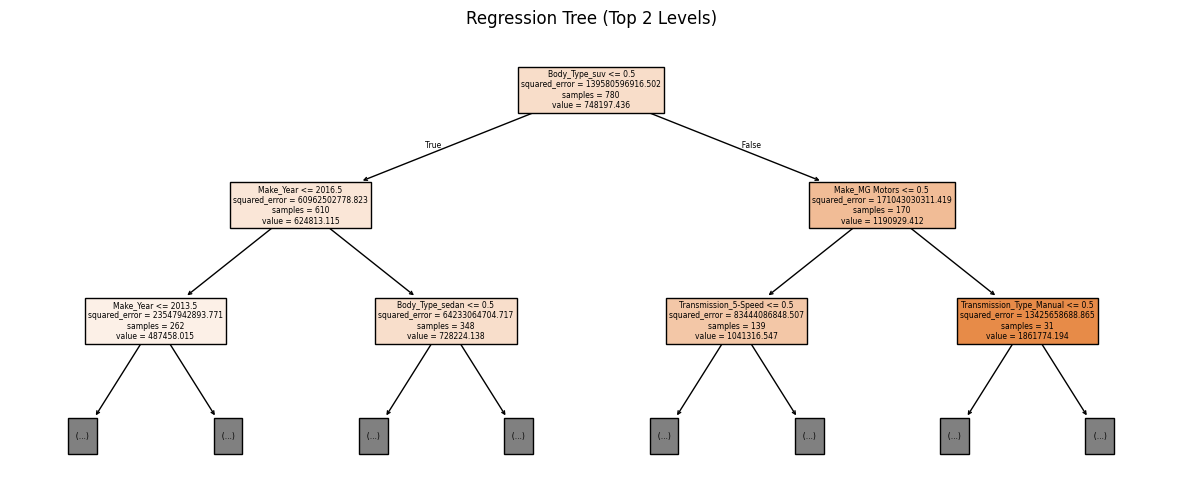

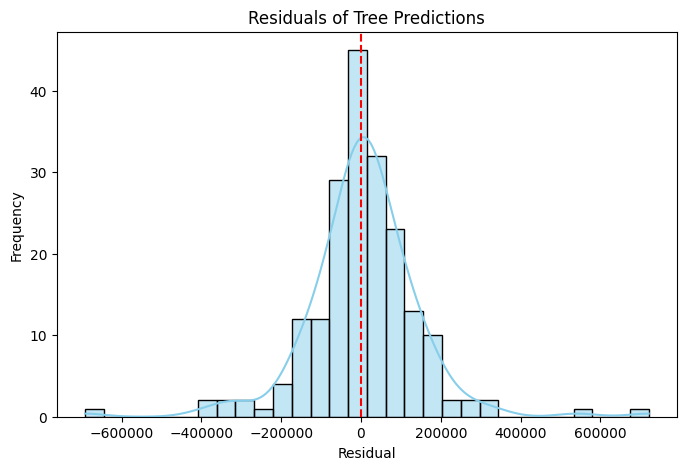

Mean of residuals (tree): 5605.531260123096
Linear Regression R²: 0.820, RMSE: 143575.20


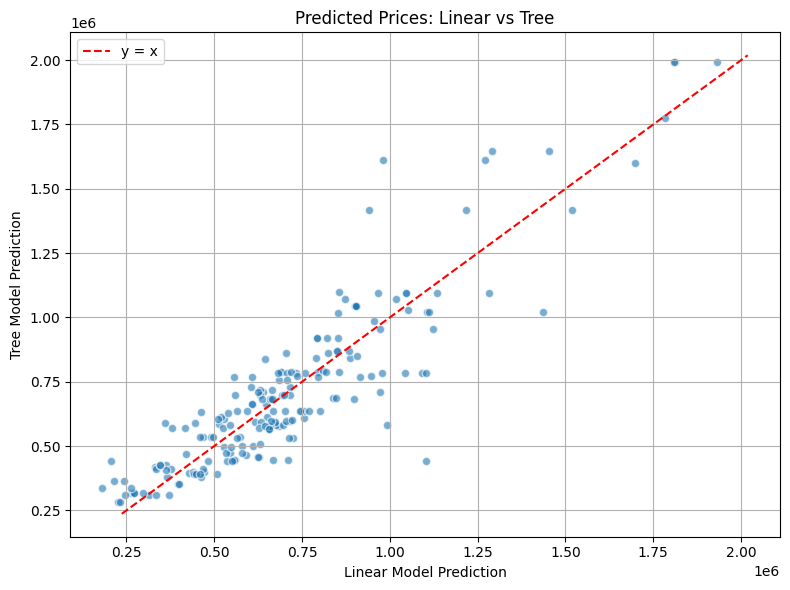

In [2]:
#Q2)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Load dataset
df = pd.read_csv('cars_hw.csv')
print("Dataset shape:", df.shape)
print("Available columns:", df.columns.tolist())
print(df.head())

# Define variables
categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
numerical_vars = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
target_var = 'Price'

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# Prepare features and target
X = df_encoded[numerical_vars + [col for col in df_encoded.columns if col.startswith(tuple(categorical_vars))]]
y = df_encoded[target_var]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tune min_samples_leaf
r2_scores = []
leaf_values = range(1, 26)
for leaf in leaf_values:
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

best_leaf = leaf_values[r2_scores.index(max(r2_scores))]
print(f"\nBest min_samples_leaf: {best_leaf} with R² = {max(r2_scores):.3f}")

# Train final tree model
tree_model = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f"Decision Tree R²: {r2_tree:.3f}, RMSE: {rmse_tree:.2f}")

# Plot tree
plt.figure(figsize=(15, 6))
plot_tree(tree_model, filled=True, max_depth=2, feature_names=X.columns)
plt.title("Regression Tree (Top 2 Levels)")
plt.show()

# Residuals
residuals_tree = y_test - y_pred_tree
plt.figure(figsize=(8, 5))
sns.histplot(residuals_tree, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title("Residuals of Tree Predictions")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')
plt.show()
print("Mean of residuals (tree):", residuals_tree.mean())

# Linear regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print(f"Linear Regression R²: {r2_lin:.3f}, RMSE: {rmse_lin:.2f}")

# Compare predictions visually
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lin, y_pred_tree, alpha=0.6, edgecolors='w')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="y = x")
plt.xlabel("Linear Model Prediction")
plt.ylabel("Tree Model Prediction")
plt.title("Predicted Prices: Linear vs Tree")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


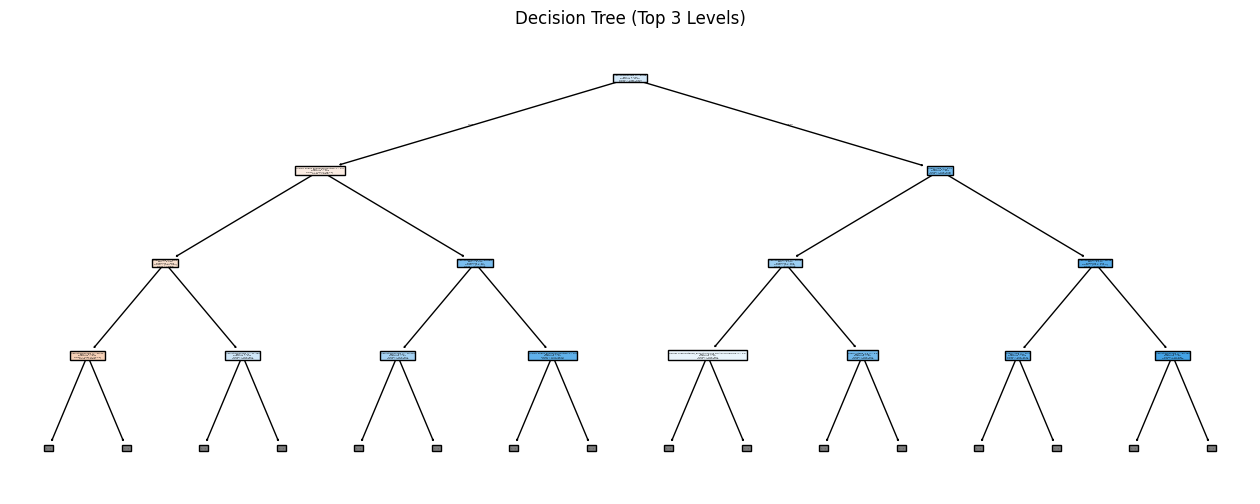

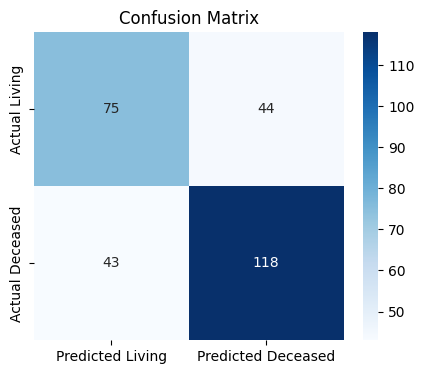

Classification Accuracy: 0.689
Sensitivity (TPR): 0.733
Specificity (TNR): 0.630

Best min_samples_leaf for regression: 90
Regression R²: 0.121
Regression RMSE: 75.01 months


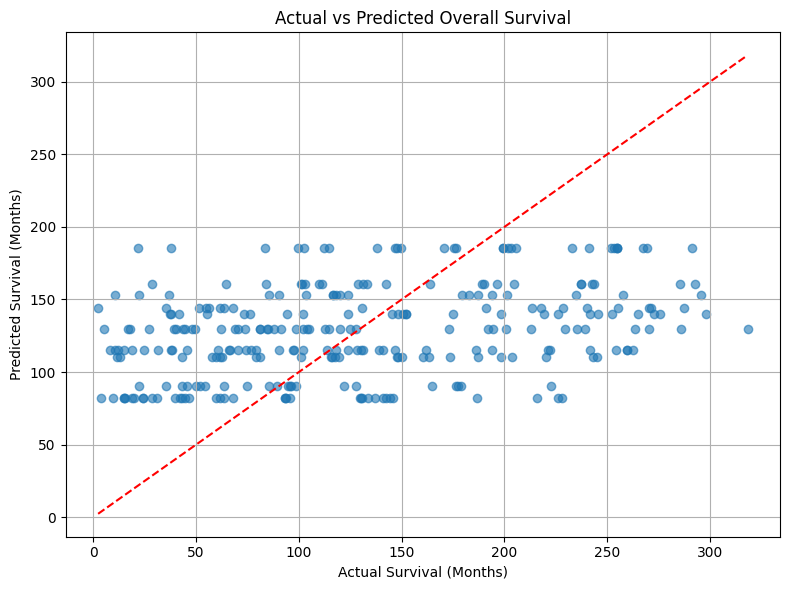

In [3]:
#Q5)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, mean_squared_error

# Load the dataset
df = pd.read_csv("Breast Cancer METABRIC.csv")

# -----------------------------------------------
# Part 1: Classification - Predict Survival Status
# -----------------------------------------------

# Select features and classification target
features = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis',
            'Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']
target_class = 'Overall Survival Status'

# Drop missing rows for classification
df_class = df[features + [target_class]].dropna()

# One-hot encode categoricals
df_encoded = pd.get_dummies(df_class, columns=['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed'], drop_first=True)

# Define X and y
X = df_encoded.drop(columns=target_class)
y = df_encoded[target_class].map({'Living': 0, 'Deceased': 1})  # binary encoding

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit decision tree
clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Plot tree (top levels)
plt.figure(figsize=(16, 6))
plot_tree(clf, feature_names=X.columns, class_names=['Living', 'Deceased'], filled=True, max_depth=3)
plt.title("Decision Tree (Top 3 Levels)")
plt.show()

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Living', 'Predicted Deceased'],
            yticklabels=['Actual Living', 'Actual Deceased'])
plt.title("Confusion Matrix")
plt.show()

# Sensitivity and specificity
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f"Classification Accuracy: {accuracy:.3f}")
print(f"Sensitivity (TPR): {sensitivity:.3f}")
print(f"Specificity (TNR): {specificity:.3f}")

# -----------------------------------------------
# Part 2: Regression - Predict Survival Months
# -----------------------------------------------

# Regression target
target_reg = 'Overall Survival (Months)'

# Drop missing rows for regression
df_reg = df[features + [target_reg]].dropna()

# One-hot encode categoricals
df_reg_encoded = pd.get_dummies(df_reg, columns=['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed'], drop_first=True)

# Define X and y
X_reg = df_reg_encoded.drop(columns=target_reg)
y_reg = df_reg_encoded[target_reg]

# Train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Tune min_samples_leaf
best_r2 = -np.inf
best_leaf = None
for leaf in range(5, 150, 5):
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train_r, y_train_r)
    y_pred = model.predict(X_test_r)
    score = r2_score(y_test_r, y_pred)
    if score > best_r2:
        best_r2 = score
        best_leaf = leaf

# Final model
final_model = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
final_model.fit(X_train_r, y_train_r)
y_pred_final = final_model.predict(X_test_r)

# Evaluate regression
final_r2 = r2_score(y_test_r, y_pred_final)
final_rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_final))
print(f"\nBest min_samples_leaf for regression: {best_leaf}")
print(f"Regression R²: {final_r2:.3f}")
print(f"Regression RMSE: {final_rmse:.2f} months")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test_r, y_pred_final, alpha=0.6)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')
plt.xlabel("Actual Survival (Months)")
plt.ylabel("Predicted Survival (Months)")
plt.title("Actual vs Predicted Overall Survival")
plt.grid(True)
plt.tight_layout()
plt.show()
